***
### How Surprise works?

Surprise provides a bunch of built-in algorithms. All algorithms derive from the AlgoBase base class, where are implemented some key methods (e.g. predict, fit and test). The list and details of the available prediction algorithms can be found in the prediction algorithms package documentation.

**Source: https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html*
***

# Data To Surpise Format

In [1]:
#load packages and functions

%run ./All_Functions.py

#load extra data 
products_df = pd.read_csv("./data/Products.csv")
customers_df = pd.read_csv("./data/Customers.csv")


C:\Users\Iro\anaconda3\envs\iro\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [2]:
#specify rating type
rating_column='Quantity'
#Leave One Out Test or normal fit
leave_one_out=False
loo_rate='-'

In [3]:
#get data , choose rating column 
train , test , rating_column = load_dill(rating_column=rating_column,load_cv=False)


#transform trianset , create antitestset 
data , rating_column = read_data(data=train,rating_column=rating_column)
print(rating_column)

#trainset preview 
train.shape

Quantity


(67107, 3)

### Leave One Out Test

##### removes from the train dataframe each customer's highest rated product 


In [4]:
# leave_one_out=True
# # rating_column=''
# LOO=True
# precision='-'
# recall='-'

# #create trainset 
# (loo_train,highest_rated_products ,rating_column)=Leave_highest_rating_out(dataframe=train)

# #to surprise format
# data,rating_column=read_data(data=loo_train,rating_column=rating_column,trainset=False,anti_test=False)
# train=loo_train


### Sparse Matrix

Only 3% of Customer-Product interactions is known. Have to predict the rest 97% .

In [5]:
calculate_sparsity(data=train,rating_column=rating_column,products_df=products_df
                    ,customers_df=customers_df,matrix_display='id',compressed=False).iloc[:10,:5]

Sparsity: 0.97


ProductId,00BEC3E7-E598-E911-80CF-000D3AB18B8E,00D466F8-CD4E-EA11-A81F-000D3A497E15,014C107A-E898-E911-80CF-000D3AB18B8E,01C94D28-E498-E911-80CF-000D3AB18B8E,02BEC3E7-E598-E911-80CF-000D3AB18B8E
CustomerId,,,,,
000CAC9C-AF57-EA11-A81F-000D3A497E15,0.0,0.0,0.0,0.0,0.0
001C2C84-A312-EA11-A81C-000D3A497E15,0.0,0.0,0.0,2.0,0.0
002861E1-5721-EA11-A81D-000D3A497E15,0.0,0.0,0.0,0.0,0.0
00382A56-9D15-EA11-A81C-000D3A497E15,0.0,0.0,0.0,0.0,0.0
00459F71-952D-EA11-A81D-000D3A497E15,0.0,0.0,0.0,0.0,0.0
004D58CE-2A38-EA11-A81E-000D3A497E15,0.0,0.0,0.0,0.0,0.0
0061F14B-F54F-EA11-A81F-000D3A497E15,0.0,0.0,0.0,0.0,0.0
00621410-9212-EA11-A81C-000D3A497E15,0.0,0.0,0.0,0.0,0.0
0064A8A3-1E33-EA11-A81D-000D3A497E15,0.0,0.0,0.0,1.0,0.0


# First look
### Cross Validation

In [6]:
#crete randomized dataset as to conduct cross validation results 
cv_train , cv_test =  train_test_split(train,test_size=0.2,random_state=0)
#data to surprise mode
cv_train , rating =read_data(data=train,rating_column=rating_column,trainset=False,anti_test=False)

#cross validate for every algorithm in the Surprise library
algos=[NMF(),SVD(), SVDpp(), SlopeOne(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(),
       KNNWithZScore(), BaselineOnly(), CoClustering()]

#For negative values NMF raises an error
if rating_column in ['Bias1']:
    #remove NMF 
    algos.pop(0)
       
#get results
results_cv , finish =cross_validation(data=cv_train,algorithm=algos,measures=['rmse'],
                                      cv=5,return_train_measures=True,verbose=True,n_jobs=2)
results_cv , finish

Evaluating RMSE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    27.3992 32.0625 64.0695 30.2312 28.1485 36.3822 13.9397 
RMSE (trainset)   10.1558 12.6623 5.8159  10.5624 11.1875 10.0768 2.2941  
Fit time          8.01    8.09    7.28    7.31    5.31    7.20    1.00    
Test time         0.13    0.13    0.12    0.12    0.13    0.13    0.01    
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    6930.65456930.73286930.90446930.33046930.94416930.71320.2192  
RMSE (trainset)   6930.72796930.70846930.66556930.80896930.65556930.71330.0548  
Fit time          7.03    7.06    5.94    5.86    7.26    6.63    0.60    
Test time         0.19    0.15    0.27    0.33    0.14    0.21    0.07    
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)

(                 test_rmse  train_rmse  fit_time  test_time
 Algorithm                                                  
 BaselineOnly        27.027      30.705     0.118      0.155
 KNNBasic            27.115       0.844     6.011     16.405
 KNNBaseline         27.296       3.145     6.090     21.138
 SlopeOne            28.409      29.915     0.202      0.374
 KNNWithMeans        28.762       6.153     6.090     15.442
 KNNWithZScore       34.910      13.373     5.991     13.803
 NMF                 36.382      10.077     7.199      0.127
 NormalPredictor     37.933      39.288     0.106      0.158
 CoClustering        51.128      15.880     2.076      0.110
 SVD               6930.713    6930.713     6.628      0.215
 SVDpp             6930.713    6930.713    30.230      0.597,
 1173.6413805484772)

In [7]:
results_cv

,test_rmse,train_rmse,fit_time,test_time
Algorithm,,,,
BaselineOnly,27.027,30.705,0.118,0.155
KNNBasic,27.115,0.844,6.011,16.405
KNNBaseline,27.296,3.145,6.090,21.138
SlopeOne,28.409,29.915,0.202,0.374
KNNWithMeans,28.762,6.153,6.090,15.442
KNNWithZScore,34.910,13.373,5.991,13.803
NMF,36.382,10.077,7.199,0.127
NormalPredictor,37.933,39.288,0.106,0.158
CoClustering,51.128,15.880,2.076,0.110


### Load Results CV

In [8]:
# #load cv results based on rating column
results_cv=round(load_dill(rating_column=rating_column,load_cv=True) , 3)
results_cv

,test_rmse,train_rmse,fit_time,test_time
Algorithm,,,,
BaselineOnly,27.129,30.716,0.090,0.121
KNNBasic,27.311,0.843,5.502,13.053
KNNBaseline,27.746,3.118,5.852,15.160
SlopeOne,28.326,29.855,0.205,0.358
KNNWithMeans,29.093,6.198,5.578,14.117
KNNWithZScore,33.525,13.421,5.868,14.183
NMF,34.230,10.842,6.260,0.152
CoClustering,37.552,19.088,2.481,0.172
NormalPredictor,37.961,39.368,0.122,0.182


In [9]:
# #algorithm with lowest RMSE
algo=load_dill(rating_column=rating_column,load_cv=True)[:1].index[0]
algo

'BaselineOnly'

# Hyperparameter Tunning 

In [25]:
algo='BaselineOnly'
#perform Randomized Search
(score, parameters, time_elapsed, info, algorithm) = Grid_Search(data=data,algorithm=BaselineOnly,
                                                                 param_grid=get_paramgrid(algo),Grid_Search=False,cv=5,
                                                                 measures=['rmse'],joblib_verbose=8,n_iter=5,n_jobs=1)

Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...
Estimating biases using sgd...


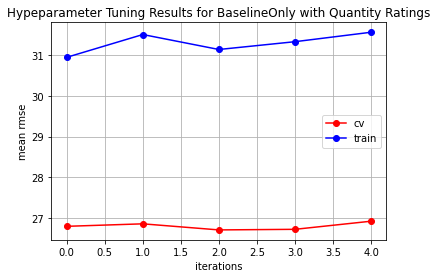

In [26]:
#plot Hyperparameter results 

plt.plot(info['mean_test_rmse'],color='r',label='cv',marker='o')
#train rmse
plt.plot(info['mean_train_rmse'],color='b',label='train',marker='o')
plt.legend()
plt.title('Hypeparameter Tuning Results for {0} with {1} Ratings'.format(algo,rating_column))
plt.xlabel('iterations')
plt.ylabel('mean rmse')
plt.grid()
 

In [27]:
#detailed dataframe 
# info.sort_values('mean_test_rmse')
info

,split0_test_rmse,split0_train_rmse,split1_test_rmse,split1_train_rmse,split2_test_rmse,split2_train_rmse,split3_test_rmse,split3_train_rmse,split4_test_rmse,split4_train_rmse,...,std_train_rmse,rank_test_rmse,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_bsl_options,Search,algo
0,62.538390,17.379457,18.805594,34.212265,17.383631,34.401169,17.939685,34.324949,17.339701,34.402526,...,6.782664,3,0.372029,0.021073,0.103874,0.040240,"{'bsl_options': {'method': 'sgd', 'learning_ra...","{'method': 'sgd', 'learning_rate': 0.001, 'n_e...",RandomizedSearchCV,<class 'surprise.prediction_algorithms.baselin...
1,62.583591,17.903165,18.849110,34.785087,17.520284,34.955567,17.982505,34.897284,17.376450,34.972144,...,6.800058,4,0.554977,0.071549,0.068008,0.003880,"{'bsl_options': {'method': 'sgd', 'learning_ra...","{'method': 'sgd', 'learning_rate': 2.154434690...",RandomizedSearchCV,<class 'surprise.prediction_algorithms.baselin...
2,62.531607,17.535318,18.662997,34.419028,17.322593,34.593795,17.818180,34.529374,17.230740,34.602561,...,6.800665,1,0.394643,0.055051,0.086975,0.016945,"{'bsl_options': {'method': 'sgd', 'learning_ra...","{'method': 'sgd', 'learning_rate': 0.000464158...",RandomizedSearchCV,<class 'surprise.prediction_algorithms.baselin...
3,62.540720,17.692609,18.665561,34.620345,17.358602,34.789425,17.836445,34.729642,17.237925,34.803249,...,6.817528,2,0.702958,0.185743,0.098336,0.029572,"{'bsl_options': {'method': 'sgd', 'learning_ra...","{'method': 'sgd', 'learning_rate': 0.0001, 'n_...",RandomizedSearchCV,<class 'surprise.prediction_algorithms.baselin...
4,62.606798,17.987273,18.939161,34.832720,17.596360,35.004728,18.052592,34.947019,17.438392,35.022095,...,6.786070,5,0.343345,0.015949,0.092717,0.006476,"{'bsl_options': {'method': 'sgd', 'learning_ra...","{'method': 'sgd', 'learning_rate': 2.154434690...",RandomizedSearchCV,<class 'surprise.prediction_algorithms.baselin...


In [28]:
#best score and parameters according to rmse
score ,parameters['rmse']

({'rmse': 26.71322346265518},
 {'bsl_options': {'method': 'sgd',
   'learning_rate': 0.00046415888336127773,
   'n_epochs': 20}})

# Training

### Get Predictions

In [44]:
#in case of no Hyperparameter tunning , input is an object algorithm
# algorithm=BaselineOnly


In [29]:
#predictions for the items the user HAS NOT BOUGHT 
predictions,fit_time=get_predictions(data=data,algo=algorithm,anti_test=True,provided_test=None)
#preview
predictions[:2]

#accuracy.rmse(predictions)

Estimating biases using sgd...


[Prediction(uid='000CAC9C-AF57-EA11-A81F-000D3A497E15', iid='01C94D28-E498-E911-80CF-000D3AB18B8E', r_ui=7.363464318178432, est=3.042088609120195, details={'was_impossible': False}),
 Prediction(uid='000CAC9C-AF57-EA11-A81F-000D3A497E15', iid='0A220C06-E998-E911-80CF-000D3AB18B8E', r_ui=7.363464318178432, est=3.104560328707307, details={'was_impossible': False})]

#### estimations vs true values

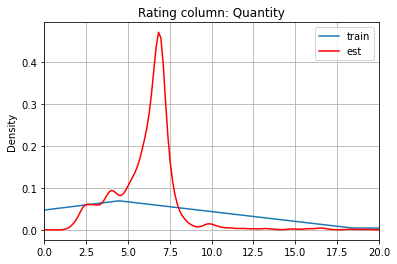

In [30]:
estimations=pd.DataFrame(predictions)

train[rating_column].plot(kind='kde',label='train')
plt.title('Rating column: {0}'.format(rating_column))
estimations['est'].plot(kind='kde',color='red',label='est')
plt.xlim(0,20)
plt.grid()
plt.legend()
 

# Recommendations
## Rank Predicitons , Top N

In [31]:
#get topN for each customer 
N=5
output ,N = recommend(products_df=products_df,customers_df=customers_df,predictions=predictions,N=N)

In [32]:
#preview
output[:5]

,CustomerName,Top5,Top5_Ids
000CAC9C-AF57-EA11-A81F-000D3A497E15,Σπύρος Οικονόμου,"[CAP CALDO REGULAR BRAZILIAN, CALDO GRANDE BRA...","[CADC48A5-E998-E911-80CF-000D3AB18B8E, C7DC48A..."
001C2C84-A312-EA11-A81C-000D3A497E15,Μιχάλης Παρασκευόπουλος,"[ESPRESSO FREDDO BRAZILIAN, CAP CALDO REGULAR ...","[A408E898-E998-E911-80CF-000D3AB18B8E, CADC48A..."
002861E1-5721-EA11-A81D-000D3A497E15,Δημητρα Λουστροπούλου,"[ESPRESSO FREDDO BRAZILIAN, CAP CALDO REGULAR ...","[A408E898-E998-E911-80CF-000D3AB18B8E, CADC48A..."
00382A56-9D15-EA11-A81C-000D3A497E15,Tatiana Tarasenko,"[ESPRESSO FREDDO ARABICA, ESPRESSO FREDDO BRAZ...","[0DC57A94-EC98-E911-80CF-000D3AB18B8E, A408E89..."
00459F71-952D-EA11-A81D-000D3A497E15,Stylianos Voulgaridis,"[ESPRESSO FREDDO ARABICA, ESPRESSO FREDDO BRAZ...","[0DC57A94-EC98-E911-80CF-000D3AB18B8E, A408E89..."


### TopNs Ranking


In [33]:
topn=count_topn_occurances(recommendations=output,return_recommendations_df=False,N=N)
topn

Unique Topn: 166


,Top5,Times_recommended,top1,top2,top3,top4,top5
0,"[ESPRESSO FREDDO BRAZILIAN, CAP CALDO REGULAR ...",1010,ESPRESSO FREDDO BRAZILIAN,CAP CALDO REGULAR BRAZILIAN,CALDO GRANDE BRAZILIAN,ESP FREDDO REG(TAXI),CALDO GRANDE ARABICA
1,"[ESPRESSO FREDDO ARABICA, ESPRESSO FREDDO BRAZ...",533,ESPRESSO FREDDO ARABICA,ESPRESSO FREDDO BRAZILIAN,CAP CALDO REGULAR BRAZILIAN,CALDO GRANDE BRAZILIAN,ESP FREDDO REG(TAXI)
2,"[ESPRESSO FREDDO ARABICA, CALDO GRANDE BRAZILI...",499,ESPRESSO FREDDO ARABICA,CALDO GRANDE BRAZILIAN,ESP FREDDO REG(TAXI),CALDO GRANDE ARABICA,CAPPUCCINO CALDO REGULAR(TAXI)
3,"[CAP CALDO REGULAR BRAZILIAN, CALDO GRANDE BRA...",421,CAP CALDO REGULAR BRAZILIAN,CALDO GRANDE BRAZILIAN,ESP FREDDO REG(TAXI),CALDO GRANDE ARABICA,CAPPUCCINO CALDO REGULAR(TAXI)
4,"[ESPRESSO FREDDO BRAZILIAN, CAP CALDO REGULAR ...",364,ESPRESSO FREDDO BRAZILIAN,CAP CALDO REGULAR BRAZILIAN,CALDO GRANDE BRAZILIAN,ESP FREDDO REG(TAXI),CAPPUCCINO CALDO REGULAR(TAXI)
...,...,...,...,...,...,...,...
161,"[ESPRESSO FREDDO BRAZILIAN, CAP CALDO REGULAR ...",1,ESPRESSO FREDDO BRAZILIAN,CAP CALDO REGULAR BRAZILIAN,CALDO GRANDE BRAZILIAN,FRAPPE REGULAR,ΚΡΕΜΑ ΚΛΑΣΙΚΗ BR REG
162,"[ESPRESSO FREDDO ARABICA, CALDO GRANDE BRAZILI...",1,ESPRESSO FREDDO ARABICA,CALDO GRANDE BRAZILIAN,CALDO GRANDE ARABICA,CAP CALDO REGULAR ARABICA,ΣΤΙΓΜΙΑΙΟΣ ΖΕΣΤΟΣ REGULAR(TAXI)
163,"[CAP CALDO REGULAR BRAZILIAN, CALDO GRANDE BRA...",1,CAP CALDO REGULAR BRAZILIAN,CALDO GRANDE BRAZILIAN,CAPPUCCINO CALDO REGULAR(TAXI),CAP CALDO REGULAR ARABICA,FRAPPE REGULAR
164,"[CALDO GRANDE BRAZILIAN, CALDO GRANDE ARABICA,...",1,CALDO GRANDE BRAZILIAN,CALDO GRANDE ARABICA,ΣΤΙΓΜΙΑΙΟΣ ΖΕΣΤΟΣ REGULAR(TAXI),ΚΡΕΜΑ ΚΛΑΣΙΚΗ BR REG,ΣΤΙΓΜΙΑΙΟΣ ΖΕΣΤΟΣ REGULAR


### Unique Recommendations

In [34]:
#unique recommendations   
unique_topNs=topn.shape[0] / train['CustomerId'].nunique() * 100
print("Unique recommendations per customer: {0}%".format(round(unique_topNs ,2)))

Unique recommendations per customer: 2.99%


### Check Product Existence In TopN


In [35]:
# product='CLUB SANDWICH ΜΕ ΠΑΤΑΤΕΣ'
# count_product_in_topn(product_name=product,recommendations=output)

count_product_in_topn(product_name='ESPRESSO FREDDO ARABICA',recommendations=output)

False    3503
True     2045
Name: topn_to_str, dtype: int64

### Products in TopN

In [36]:
product_popularity_in_recommendations(recommendation_df=output,N=N)

Unique products in all TopN: 17 


{'ESP FREDDO REG(TAXI)': 5349,
 'CALDO GRANDE BRAZILIAN': 4571,
 'CALDO GRANDE ARABICA': 3932,
 'CAPPUCCINO CALDO REGULAR(TAXI)': 3422,
 'CAP CALDO REGULAR BRAZILIAN': 2927,
 'ESPRESSO FREDDO BRAZILIAN': 2894,
 'ESPRESSO FREDDO ARABICA': 2045,
 'FRAPPE REGULAR': 983,
 'CAP CALDO REGULAR ARABICA': 750,
 'ΣΤΙΓΜΙΑΙΟΣ ΖΕΣΤΟΣ REGULAR(TAXI)': 609,
 'ΚΡΕΜΑ ΚΛΑΣΙΚΗ BR REG': 183,
 'ΣΤΙΓΜΙΑΙΟΣ ΖΕΣΤΟΣ REGULAR': 34,
 'CALDO SINGLE BRAZILIAN': 16,
 'ΣΤΙΓΜΙΑΙΟΣ ΖΕΣΤΟΣ GRANDE': 14,
 'FREDDO GRANDE DECAF.': 6,
 'LATTE GRANDE BRAZILIAN': 3,
 'CAPPUCCINO FREDDO REGULAR(TAXI)': 2}

### Unique Products In TopN


In [37]:
unique_TopN_products=len(product_popularity_in_recommendations(recommendation_df=output,N=N)) / train['ProductId'].nunique() *100
print("Unique products in recommendations : {0}%".format(round(unique_TopN_products ,2)))

Unique products in all TopN: 17 
Unique products in recommendations : 4.04%


# Evaluation

## Hit Rate

In [38]:
(hit_rate ,hits ,count_customers ,timing ,products_in_hits ,threshold,customer_dicts) = calculate_accuracy(recommend=output,train=train,
                                                    test=test,products_df=products_df,customers_df=customers_df,threshold=1,N=N,show=False)
 

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


In [39]:
(hit_rate ,hits ,count_customers ,timing ,products_in_hits[:2] ,threshold) 

(0.29,
 1455,
 4948,
 418.77816247940063,
 ['CAP CALDO REGULAR BRAZILIAN', 'CALDO GRANDE ARABICA'],
 1)

In [40]:
customer_dicts[:1]

[defaultdict(int,
             {'CustomerId': '000CAC9C-AF57-EA11-A81F-000D3A497E15',
              'CustomerName': 'Σπύρος Οικονόμου',
              'Recommendations': ['CAP CALDO REGULAR BRAZILIAN',
               'CALDO GRANDE BRAZILIAN',
               'ESP FREDDO REG(TAXI)',
               'CALDO GRANDE ARABICA',
               'CAPPUCCINO CALDO REGULAR(TAXI)'],
              'Will_buy': ['ESPRESSO FREDDO ARABICA',
               'ΧΕΙΡΟΠ. ΑΥΘ. ΠΟΛΙΤΙΚΗ ΚΟΥΡΟΥ',
               'ΓΑΛ.ΚΡΟΥΑΣΑΝ ΣΟΚ.-ΦΟΥΝ.',
               'ESPRESSO FREDDO BRAZILIAN',
               'ΠΑΡΑΔΟΣΙΑΚΗ ΤΥΡΟΠΙΤΑ',
               'ΧΩΡ. ΣΠΑΝΑΚΟΤΥΡΟΠΙΤΑ ΤΑΨΙΟΥ ΜΕ ΦΕΤΑ ΠΟΠ'],
              'Hits_number': 0,
              'Hits': [],
              'Prior_purchases': ['ESPRESSO FREDDO ARABICA',
               'FREDDO REGULAR ARABICA',
               'ESPRESSO FREDDO BRAZILIAN',
               'FRAPPE REGULAR',
               'ΚΡΕΜΑ ΚΛΑΣΙΚΗ BR REG',
               'ESPR CALDO REGULAR BRAZILIAN',
               'ΠΑΡΑΔΟ

### Recommendation Results preview 

In [41]:
#number of customer results to load
n=10
customers=pd.Series(output.index).sample(n).values
 
for customer in customers:
    recommendation_results(customer=customer,recommendation=output,train=train,test=test,products_df=products_df,customers_df=customers_df,
                        N=N,return_values=False,show=True)

CustomerId: 00FBC28B-2433-EA11-A81D-000D3A497E15 , Customer Name: Christos Nazopoulos
Recommendations:
 ['ESPRESSO FREDDO ARABICA', 'ESP FREDDO REG(TAXI)', 'CALDO GRANDE ARABICA', 'CAPPUCCINO CALDO REGULAR(TAXI)', 'CAP CALDO REGULAR ARABICA']
Will buy:
 ['ESPRESSO FREDDO ARABICA', 'ESPRESSO FREDDO BRAZILIAN', 'CAP CALDO REGULAR BRAZILIAN']
Hits:
 1 ['ESPRESSO FREDDO ARABICA'] 
Prior Purchases:
 ['ΑΥΡΑ ΝΕΡΟ 0,5L', 'ESPRESSO FREDDO BRAZILIAN', 'CALDO GRANDE BRAZILIAN', 'CAP CALDO REGULAR BRAZILIAN', 'FREDDO GRANDE BRAZILIAN', 'FREDDO REGULAR BRAZILIAN']
Prior Purchases in Recommendations:
 (0, [])
New Products: 1 
 ['ESPRESSO FREDDO ARABICA'] 


CustomerId: AB4F523E-3917-EA11-A81C-000D3A497E15 , Customer Name: Μιχαήλ Αφεντουλίδης
Recommendations:
 ['ESPRESSO FREDDO BRAZILIAN', 'CALDO GRANDE BRAZILIAN', 'ESP FREDDO REG(TAXI)', 'CALDO GRANDE ARABICA', 'CAPPUCCINO CALDO REGULAR(TAXI)']
Will buy:
 ['ESPRESSO FREDDO ARABICA', 'ESPRESSO FREDDO BRAZILIAN']
Hits:
 1 ['ESPRESSO FREDDO BRAZILIAN']

### What Products Have The Most Hits?

In [42]:
hit_popularity_matrix(hit_products=products_in_hits)

,Product,Hits
1,ESPRESSO FREDDO ARABICA,599
2,ESPRESSO FREDDO BRAZILIAN,515
3,CAP CALDO REGULAR BRAZILIAN,154
4,FRAPPE REGULAR,101
5,CALDO GRANDE ARABICA,92
6,CALDO GRANDE BRAZILIAN,88
7,CAP CALDO REGULAR ARABICA,63
8,ESP FREDDO REG(TAXI),24
9,CAPPUCCINO CALDO REGULAR(TAXI),20
10,ΚΡΕΜΑ ΚΛΑΣΙΚΗ BR REG,8


## Precusion@N & Recall@N : 

![image info](./Precision_Recall_table_zoom.png)


 
***
•	TP: The algorithm predicts that the user is going to buy the product (recommendation) and the user actually buys the product.

•	FP: The algorithm recommends the product but the user does not buy it.


•	FN: The algorithm doe not recommend the product but the user buys it.

•	TN: The algorithm does not recommend the product, the user does not buy the product.


***
                                         Precision = TP / TP + TN , (# of Hits / Recommendations)



***
                                         Recall = TP / TP + FN , (# of Hits / Recommendations)

***

In [43]:
precision, recall, precision_d , recall_d = precision_recall_at_N(recommendation_results=customer_dicts,count_customers=count_customers,
                                                                  products_df=products_df,customers_df=customers_df,N=N)

0.07 0.1


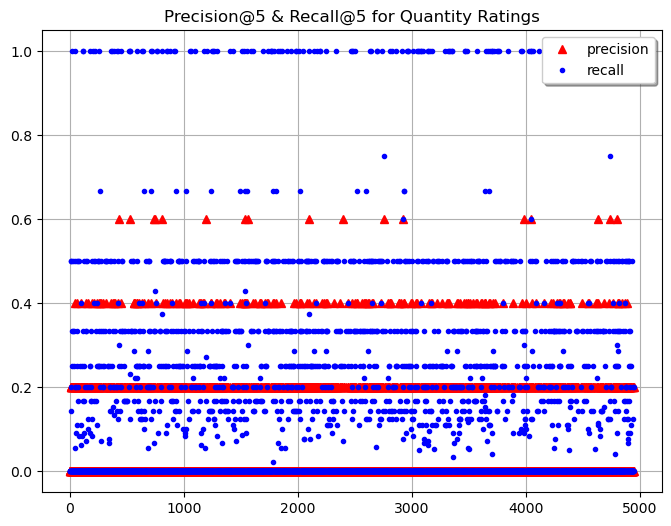

In [44]:
plt.style.use('default')

plt.figure(figsize=(8,6))
plt.plot(precision_d.values(),'r^',label='precision')
plt.plot(recall_d.values(),'b.',label='recall')
plt.grid()
plt.legend(loc='best',shadow=True)
plt.title("Precision@{0} & Recall@{1} for {2} Ratings".format(N,N,rating_column));

### Choose N

In [10]:
# k_list=[3,5,10]
# precision_k=[]
# recall_k=[]
# precision_for_k=[]
# recall_for_k=[]

# for k in k_list:
#    print(k)
   
#    customer_dicts=[]
#    #recommendations for k
#    output ,k = recommend(products_df=products_df,customers_df=customers_df,predictions=predictions,N=k)
#    for customer in output.index:
#       temp_dict=recommendation_results(customer=customer,recommendation=output,train=train,test=test,
#                            products_df=products_df,customers_df=customers_df,N=k,return_values=True,show=False)
#       customer_dicts.append(temp_dict)

#    print('P&R loop {}'.format(k)) 
#    precision, recall, precision_d , recall_d = precision_recall_at_N(recommendation_results=customer_dicts, N=k)
 
#    precision_k.append(precision)
#    recall_k.append(recall)
#    #store customer values per k  
#    precision_for_k.append(precision_d)
#    recall_for_k.append(recall_d)




In [62]:
# #plot precision recall as to decide N 
# plt.plot(k_list, precision_k, '.r-',label='precision')
# plt.plot(k_list, recall_k, '.b-',label='recall')
# plt.legend()
# # plt.xlim(0,20)
# plt.xlabel('N');
# plt.xticks(k_list[:5])
# plt.title('Precision Recall N')
# plt.grid()

# """
# for i in range(0,3):
#     plt.style.use('default')

#     plt.figure(figsize=(6,4))
#     plt.plot(precision_for_k[i].values(),'r^',label='precision')
#     plt.plot(recall_for_k[i].values(),'b.',label='recall')
#     plt.grid()
#     plt.legend(loc='best',shadow=True)
#     plt.title("Precision@{0} & Recall@{1} for {2} Ratings".format(k_list[i],k_list[i],rating_column))
# """ 

In [63]:
# recall_df=pd.DataFrame(recall_d.items()).rename(columns={0:'CustomerId',1:'Recall@N'})
# recall1=recall_df.loc[recall_df['Recall@N']==1]

# [[entry  for entry in customer_dicts if entry['CustomerId'] in recall1['CustomerId'].values]]

## Logs

In [45]:
training_log(rating_column=rating_column,algo=algorithm,fit_time=fit_time,create_log=False,info=info,leave_one_out=leave_one_out)

,Date,Data,Algo,Tunning,Tunning_time,Best_parameters,Tunning_RMSE,Train_time,Leave_one_out
1,2021-10-13 16:16:19.707387,Quantity,SVD,RandomizedSearchCV,0.561669,"{'n_factors': 10, 'n_epochs': 10, 'lr_all': 0....",29.777515,27.82,False
2,2021-12-09 20:58:30.886440,Quantity,BaselineOnly,RandomizedSearchCV,0.134291,"{'bsl_options': {'method': 'als', 'random_stat...",27.363383,21.61,False
3,2021-12-09 21:14:20.966580,Quantity,NMF,RandomizedSearchCV,1.175717,"{'n_factors': 10, 'n_epochs': 10}",30.775008,26.27,False
4,2021-12-09 23:10:18.333972,Quantity,SVD,RandomizedSearchCV,0.51004,"{'n_factors': 20, 'n_epochs': 5, 'lr_all': 0.0...",26.902606,27.69,False
5,2021-12-09 23:31:41.704706,Quantity,SVDpp,RandomizedSearchCV,10.498532,"{'n_factors': 20, 'n_epochs': 10, 'lr_all': 5....",26.709609,108.98,False
6,2021-12-09 23:46:21.871922,Frequency1,BaselineOnly,RandomizedSearchCV,0.422648,"{'bsl_options': {'method': 'sgd', 'learning_ra...",0.185284,16.13,False
7,2021-12-10 01:21:26.937052,Frequency1,KNNBaseline,RandomizedSearchCV,13.722675,"{'bsl_options': {'method': 'sgd', 'learning_ra...",0.191524,411.3,False
8,2021-12-10 10:13:37.162233,Frequency1,SVD,RandomizedSearchCV,0.379325,"{'n_factors': 10, 'n_epochs': 5, 'lr_all': 0.0...",0.186593,21.03,False
9,2021-12-10 10:25:57.572374,Frequency2,SVD,RandomizedSearchCV,0.981455,"{'n_factors': 30, 'n_epochs': 10, 'lr_all': 0....",7.928153,22.06,False
10,2021-12-10 10:53:04.506493,Frequency2,SVDpp,RandomizedSearchCV,22.997132,"{'n_factors': 20, 'n_epochs': 20, 'lr_all': 0....",7.807397,101.94,False


In [46]:
 evaluation_log(rating_column=rating_column,algo=algorithm,N=N,precision_avg=precision,recall_avg=recall,
                hit_rate=hit_rate,hits=hits,hit_threshold=threshold,count_customers=count_customers,time_elapsed=timing,
                unique_TopN=unique_topNs,unique_products=unique_TopN_products,loo_rate='-',leave_one_out=leave_one_out,create_log=False)

,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
1,2021-12-09 16:31:09.354582,Quantity,LightFM,False,5,0.49,0.37,0.45,2231,1,4948,318.13,1.0,0.57,-
2,2021-12-09 16:46:35.756778,Quantity,LightFM,False,5,0.49,0.38,0.4,1971,1,4948,358.38,0.999,0.57,-
3,2021-12-09 16:57:48.179646,Quantity,LightFM,False,5,0.48,0.37,0.46,2275,1,4948,304.21,1.0,0.54,-
4,2021-12-09 17:23:57.331810,Quantity,LightFM,False,5,0.49,0.38,0.38,1884,1,4948,331.66,0.997,0.92,-
5,2021-12-09 20:16:26.641952,Quantity,LightFM,False,5,0.5,0.38,0.6,2973,1,4948,365.3,0.995,0.29,-
6,2021-12-09 20:58:42.762085,Quantity,BaselineOnly,False,5,0.06,0.09,0.26,1274,1,4948,306.21,0.017,0.04,-
7,2021-12-09 21:14:21.084681,Quantity,NMF,False,5,0.05,0.07,0.22,1109,1,4948,335.01,0.431,0.11,-
8,2021-12-09 23:10:18.561622,Quantity,SVD,False,5,0.11,0.17,0.45,2210,1,4948,359.52,0.121,0.06,-
9,2021-12-09 23:31:41.798261,Quantity,SVDpp,False,5,0.1,0.14,0.39,1935,1,4948,409.98,0.259,0.05,-
10,2021-12-09 23:46:22.028601,Frequency1,BaselineOnly,False,5,0.07,0.1,0.29,1439,1,4948,454.19,0.028,0.04,-


#### Leave One Out Evaluation


In [66]:
customer=train['CustomerId'].drop_duplicates().sample(1).values[0]
df=leave_one_out_info(customer=customer,data=train,removed_ratings=highest_rated_products,products_df=products_df,
                   customers_df=customers_df,rating_column=rating_column)
df

,index,Customer_Name,Product_Names,Quantity
0,39793,Θοδωρής Κουρεντζής,ESPRESSO FREDDO BRAZILIAN,7.000000
1,39789,Θοδωρής Κουρεντζής,ΦΡΕΣΚΟΣ ΧΥΜΟΣ ΠΟΡΤΟΚΑΛΙ 330 ML,4.000000
2,39796,Θοδωρής Κουρεντζής,FREDDO REGULAR BRAZILIAN,4.000000
3,39792,Θοδωρής Κουρεντζής,HOT CHOCOLATE REGULAR,2.000000
4,39788,Θοδωρής Κουρεντζής,ΦΡΕΣΚΟΣ ΧΥΜΟΣ ΠΟΡΤΟΚΑΛΙ 400 ML,1.000000
5,39790,Θοδωρής Κουρεντζής,ΝΕΟ DONUT ΠΡΑΛΙΝΑ,1.000000
6,39791,Θοδωρής Κουρεντζής,CAP CALDO REGULAR ARABICA,1.000000
7,39794,Θοδωρής Κουρεντζής,CALDO GRANDE BRAZILIAN,1.000000
8,39797,Θοδωρής Κουρεντζής,ΠΑΡΑΔΟΣΙΑΚΗ ΤΥΡΟΠΙΤΑ,1.000000
9,39795,Θοδωρής Κουρεντζής,CAP CALDO REGULAR BRAZILIAN,98.000000


In [67]:
(in_topn_rate , in_topn , customerid_in_topn, time_passed) =LeaveOneOut_hitrate(left_out_products=highest_rated_products,recommendations=output,N=N)
(in_topn_rate , in_topn , customerid_in_topn[:2])

(0.69,
 3806,
 ['000CAC9C-AF57-EA11-A81F-000D3A497E15',
  '001C2C84-A312-EA11-A81C-000D3A497E15'])

In [68]:
loo_rate=in_topn_rate
evaluation_log(rating_column=rating_column,algo=algorithm,N=N,precision_avg=precision,recall_avg=recall,
                hit_rate=hit_rate,hits=hits,hit_threshold=threshold,count_customers=count_customers,time_elapsed=timing,
                unique_TopN=unique_topNs,unique_products=unique_TopN_products,loo_rate=loo_rate,leave_one_out=leave_one_out,create_log=False)

,Date,Data,Algo,Leave_one_out,N,Precision@N,Recall@N,Hit_rate,Hits,Hit_threshold,Count_customers,Compute_time,Unique_TopN,Unique_Products,LOO_Rate
1,2021-12-09 16:31:09.354582,Quantity,LightFM,False,5,0.49,0.37,0.45,2231,1,4948,318.13,1.0,0.57,-
2,2021-12-09 16:46:35.756778,Quantity,LightFM,False,5,0.49,0.38,0.4,1971,1,4948,358.38,0.999,0.57,-
3,2021-12-09 16:57:48.179646,Quantity,LightFM,False,5,0.48,0.37,0.46,2275,1,4948,304.21,1.0,0.54,-
4,2021-12-09 17:23:57.331810,Quantity,LightFM,False,5,0.49,0.38,0.38,1884,1,4948,331.66,0.997,0.92,-
5,2021-12-09 20:16:26.641952,Quantity,LightFM,False,5,0.5,0.38,0.6,2973,1,4948,365.3,0.995,0.29,-
6,2021-12-09 20:58:42.762085,Quantity,BaselineOnly,False,5,0.06,0.09,0.26,1274,1,4948,306.21,0.017,0.04,-
7,2021-12-09 21:14:21.084681,Quantity,NMF,False,5,0.05,0.07,0.22,1109,1,4948,335.01,0.431,0.11,-
8,2021-12-09 23:10:18.561622,Quantity,SVD,False,5,0.11,0.17,0.45,2210,1,4948,359.52,0.121,0.06,-
9,2021-12-09 23:31:41.798261,Quantity,SVDpp,False,5,0.1,0.14,0.39,1935,1,4948,409.98,0.259,0.05,-
10,2021-12-09 23:46:22.028601,Frequency1,BaselineOnly,False,5,0.07,0.1,0.29,1439,1,4948,454.19,0.028,0.04,-


In [69]:
#note that: in ev[index=1] the  first column results are after Leave_highest_rating_out on the train set 


                    -----------------------------------------------END------------------------------------------------------------